In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()
print(x.shape)
print(y.shape)

(50,)
(50,)


In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)


In [54]:
from costs import compute_rmse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    y = y.reshape(-1, 1)
    
    loss_tr = []
    loss_te = []
  
  
    for i in range(k):
        
        k_indices_copy = np.copy(k_indices)
        
        x_test = x[k_indices_copy[i]]
        y_test = y[k_indices_copy[i]]

        k_indices_copy = np.delete(k_indices_copy, i, 0)

        x_train = x[k_indices_copy].reshape(-1, 1) 
        y_train = y[k_indices_copy].reshape(-1, 1)


        # ***************************************************
        # INSERT YOUR CODE HERE
        # form data with polynomial degree: TODO
        # ***************************************************
        phi_train = build_poly(x_train, degree)
        phi_test = build_poly(x_test, degree)


        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression: TODO
        # ***************************************************
        w = ridge_regression(y_train, phi_train, lambda_)


        # ***************************************************
        # INSERT YOUR CODE HERE
        # calculate the loss for train and test data: TODO
        # ***************************************************
        loss_tr.append(compute_rmse(y_train, phi_train, w))
        loss_te.append(compute_rmse(y_test, phi_test, w))
    
    
    return np.mean(loss_tr), np.mean(loss_te)

In [55]:
cross_validation(y, x, build_k_indices(y, 4, 1), 4, 2, 7)   

(0.25407080366620488, 0.29833038681870139)

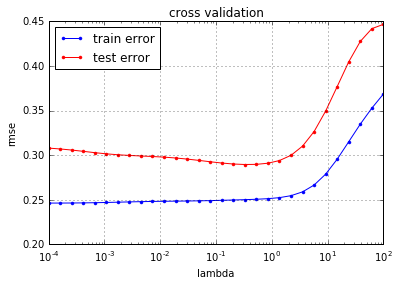

In [56]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************      
    
    for lambda_ in lambdas:
    
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)    
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

/home/bastien/Documents/Dropbox/Etudes/EPFL/Semestre7/PCML/ML_course/labs/ex04/template/split_data.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return shuffled_x[0:cut_i], shuffled_y[0:cut_i],shuffled_x[cut_i:max_i],shuffled_y[cut_i:max_i]


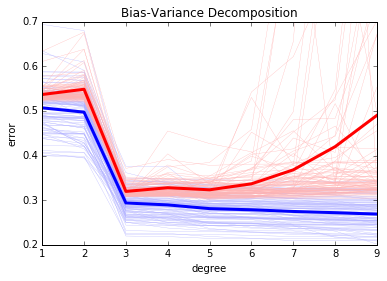

In [65]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed=seed)
        
       
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees) :
            
            phi_train = build_poly(x_train, degree)
            phi_test = build_poly(x_test, degree)

            w, L_train = least_squares(y_train, phi_train)

            rmse_tr[index_seed][index_degree] = np.sqrt(2*L_train)
            rmse_te[index_seed][index_degree] = compute_rmse(y_test, phi_test, w)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()